In [1]:
import pandas as pd

df = pd.read_parquet('positions.parquet')

In [2]:
df.head()

,x,y,distance_to_goal,distance_from_wall,degree,path_distance
0,0.116310,0.026507,0.930206,0.445217,0.222222,0.972222
1,0.649051,0.079674,0.688523,0.341394,0.083333,0.833333
2,0.661086,0.626000,0.324568,0.436693,0.583333,0.166667
3,0.542714,0.514933,0.445580,0.250822,0.000000,0.500000
4,0.621162,0.358909,0.505728,0.690169,0.416667,0.583333


In [3]:
w_path, w_wall, w_goal, w_deg = 1, 0.35, 0.15, 0.35

# --------------------------------------------------------
# 4) score (minore è migliore)
# --------------------------------------------------------
df["total_score"] = (
      w_path * df.path_distance        #  + penalità: cammino lungo
    + w_goal * df.distance_to_goal        #  + penalità: lontano dal goal
    - w_deg  * df.degree         #  + penalità: vicolo cieco
    - w_wall * df.distance_from_wall        #  – bonus: punti “larghi”, lontani dai muri
)

In [4]:
df.head()

,x,y,distance_to_goal,distance_from_wall,degree,path_distance,total_score
0,0.116310,0.026507,0.930206,0.445217,0.222222,0.972222,0.878149
1,0.649051,0.079674,0.688523,0.341394,0.083333,0.833333,0.787957
2,0.661086,0.626000,0.324568,0.436693,0.583333,0.166667,-0.141657
3,0.542714,0.514933,0.445580,0.250822,0.000000,0.500000,0.479049
4,0.621162,0.358909,0.505728,0.690169,0.416667,0.583333,0.271800


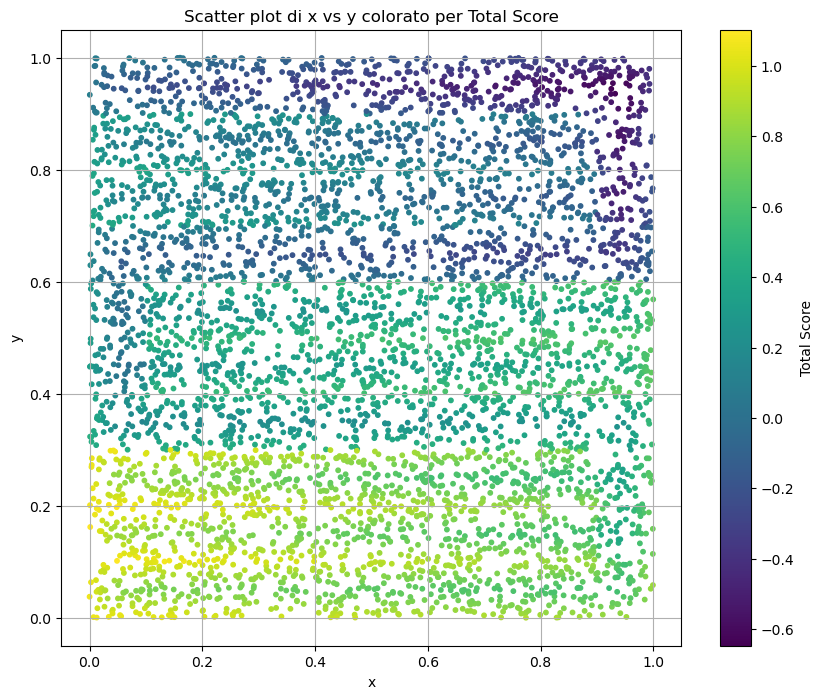

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) # Imposta la dimensione della figura
scatter = plt.scatter(df['x'], df['y'], c=df['total_score'], cmap='viridis', s=10) # s è la dimensione dei punti
    # c: specifica la colonna per il colore
    # cmap: specifica la mappa di colori (es. 'viridis', 'plasma', 'inferno', 'magma', 'cividis' sono spesso buone scelte)
    # s: specifica la dimensione dei punti

    # Aggiunta di titolo e etichette agli assi
plt.title('Scatter plot di x vs y colorato per Total Score')
plt.xlabel('x')
plt.ylabel('y')

    # Aggiunta della color bar per mostrare la scala dei colori
cbar = plt.colorbar(scatter)
cbar.set_label('Total Score')

    # Mostra il plot
plt.grid(True) # Aggiunge una griglia per riferimento
plt.show()

In [6]:
# positions.parquet  ➜  mean / std “empirici”
import pandas as pd, numpy as np, torch
df   = pd.read_parquet("positions.parquet")
MEAN = df[["x","y"]].mean().to_numpy(dtype=np.float32)
STD  = df[["x","y"]].std().to_numpy(dtype=np.float32) + 1e-6
np.savez("norm_stats.npz", mean=MEAN, std=STD)   # da ri-usare ovunque

print(MEAN)
print(STD)

[0.500647   0.49655616]
[0.2891564  0.29222897]
